In [1]:
from sklearn import datasets, cluster, metrics
from sklearn.preprocessing import scale
from sklearn import decomposition
from plotly.subplots import make_subplots
from scipy.stats import mode, kurtosis
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time as time

# **DATASET: Digits**

In [43]:
digits_data = datasets.load_digits()
X_digits = scale(digits_data.data)
y_digits = digits_data.target

# **Kurtosis and n_components**

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packa

Text(0.5, 1.0, 'The number of components and kurtosis')

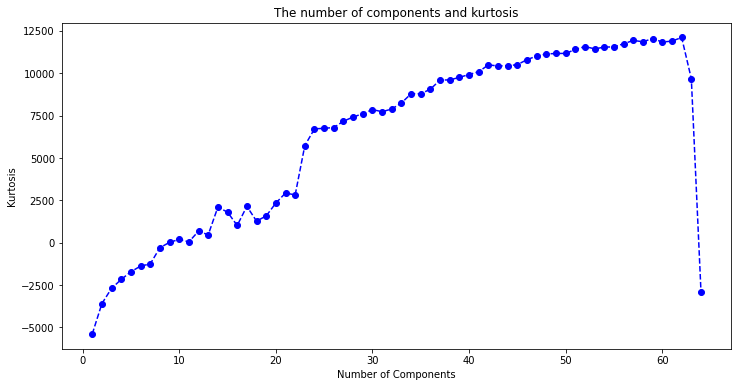

In [44]:
r = list(range(1,65))
k = []
for x in r:
  ica = decomposition.FastICA(n_components=x)
  s = 0
  for y in ica.fit_transform(X_digits):
    s = s + np.mean(kurtosis(y))
  k.append(s)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(r, k, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Kurtosis")
plt.title('The number of components and kurtosis')  

In [45]:
best_n = k.index(max(k))
ica_digits = decomposition.FastICA(n_components=r[best_n], max_iter=999)
c = ica_digits.fit_transform(X_digits)
best_n

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



61

# **Independent components**

Text(0.5, 1.0, 'The number of components and mean')

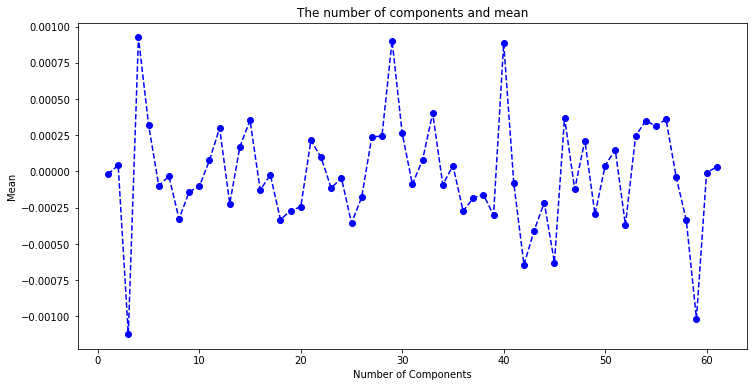

In [5]:
digits_i_c = ica_digits.components_
n = []
for x in digits_i_c:
  n.append(x.mean())
m = list(range(1, best_n+2))
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(m, n, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Mean")
plt.title('The number of components and mean')  

# **Renconstruction error**

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packa

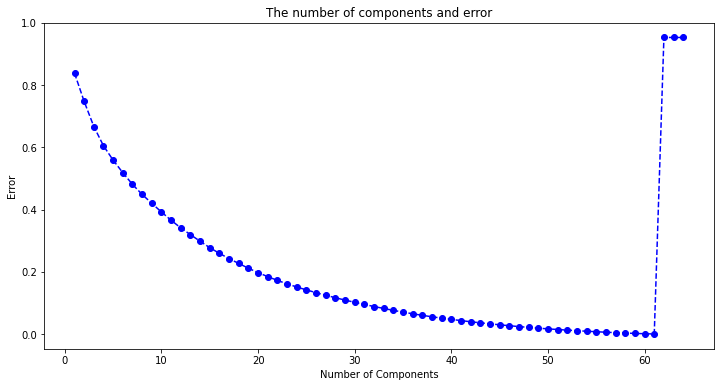

In [6]:
r = list(range(1,65))
loss = []
for i in r:
  ica = decomposition.FastICA(n_components=i)
  l = ica.fit_transform(X_digits)
  m = ica.inverse_transform(l)
  loss.append(((X_digits - m)**2).mean())
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')  
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--digits**

In [7]:
digits_kmean = cluster.KMeans(n_clusters=10, max_iter=200)
digits_clusters = digits_kmean.fit_predict(c)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.5292153589315526


# **EM--digits**

In [46]:
digits_EM = GaussianMixture(n_components=10, max_iter=200)
digits_clusters = digits_EM.fit_predict(c)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.48636616583194214


# **NN--digits--ICA**

In [9]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(c, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.89      0.96      0.93        52
           2       0.96      0.98      0.97        54
           3       0.95      0.98      0.97        57
           4       1.00      0.94      0.97        63
           5       0.98      0.91      0.94        65
           6       0.98      0.96      0.97        56
           7       1.00      0.97      0.99        69
           8       0.89      0.91      0.90        54
           9       0.86      0.92      0.89        61

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594

0.9528619528619529
--- 4.013131618499756 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



# **NN--digits--clusters--data**

In [10]:
u = np.concatenate((X_digits, digits_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.98      0.97        57
           2       0.94      0.98      0.96        51
           3       0.92      0.89      0.90        63
           4       0.96      0.98      0.97        50
           5       1.00      0.96      0.98        67
           6       0.98      0.97      0.98        64
           7       0.97      1.00      0.98        59
           8       0.90      0.96      0.93        67
           9       1.00      0.93      0.96        55

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594

0.9612794612794613
--- 1.9524788856506348 seconds ---


# **NN--digits--clusters**

In [11]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(digits_clusters.reshape(-1, 1), y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        63
           1       0.00      0.00      0.00        54
           2       0.77      0.28      0.41        61
           3       0.67      0.85      0.75        67
           4       0.00      0.00      0.00        56
           5       0.16      0.27      0.20        67
           6       0.68      0.88      0.77        56
           7       0.51      0.92      0.66        64
           8       0.00      0.00      0.00        58
           9       0.32      0.75      0.45        48

    accuracy                           0.50       594
   macro avg       0.39      0.49      0.41       594
weighted avg       0.40      0.50      0.42       594

0.5016835016835017
--- 2.4822371006011963 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **DATASET: Wine**

In [32]:
wine_data = datasets.load_wine()
X_wine = scale(wine_data.data)
y_wine = wine_data.target

# **Kurtosis and n_components**

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



Text(0.5, 1.0, 'The number of components and kurtosis')

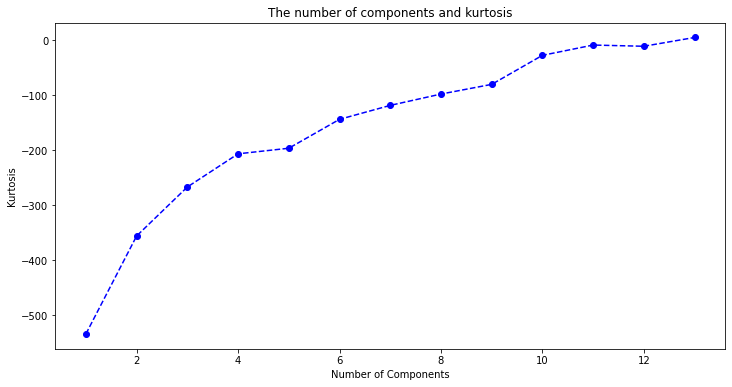

In [33]:
r = list(range(1,14))
k = []
for x in r:
  ica = decomposition.FastICA(n_components=x)
  s = 0
  for y in ica.fit_transform(X_wine):
    s = s + np.mean(kurtosis(y))
  k.append(s)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(r, k, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Kurtosis")
plt.title('The number of components and kurtosis')  

In [34]:
best_n = k.index(max(k))
ica_wine = decomposition.FastICA(n_components=r[best_n], max_iter=999)
c = ica_wine.fit_transform(X_wine)
best_n

12

# **Independent components**

Text(0.5, 1.0, 'The number of components and mean')

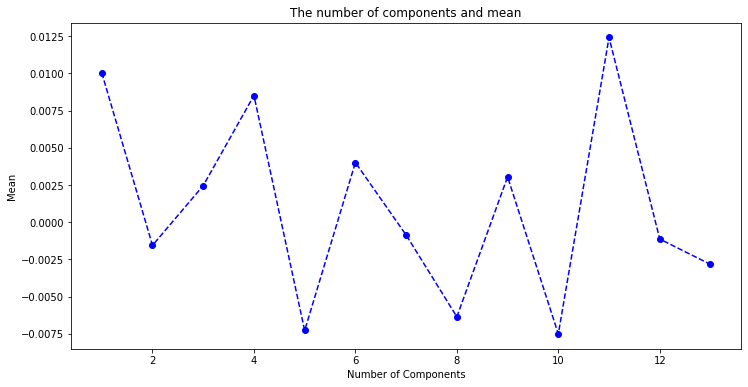

In [35]:
wine_i_c = ica_wine.components_
n = []
for x in wine_i_c:
  n.append(x.mean())
m = list(range(1, best_n+2))
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(m, n, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Mean")
plt.title('The number of components and mean')  

# **Reconstruciton error**

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



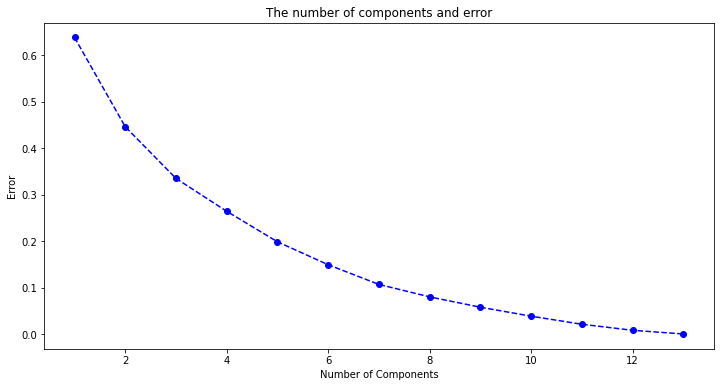

In [36]:
r = list(range(1,14))
loss = []
for i in r:
  ica = decomposition.FastICA(n_components=i)
  l = ica.fit_transform(X_wine)
  m = ica.inverse_transform(l)
  loss.append(((X_wine - m)**2).mean())
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')  
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--wine**

In [37]:
wine_kmean = cluster.KMeans(n_clusters=3, max_iter=200)
wine_clusters = wine_kmean.fit_predict(c)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9325842696629213


# **EM--wine**

In [38]:
wine_EM = GaussianMixture(n_components=3, max_iter=200)
wine_clusters = wine_EM.fit_predict(c)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.7471910112359551


# **NN--wine--ICA**

In [39]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(c, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.96      1.00      0.98        27
           2       1.00      1.00      1.00        12

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.99        59
weighted avg       0.98      0.98      0.98        59

0.9830508474576272
--- 0.29427123069763184 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



# **NN--wine--clusters--data**

In [40]:
u = np.concatenate((X_wine, wine_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.91      0.95        23
           2       0.94      1.00      0.97        16

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

0.9661016949152542
--- 0.21706080436706543 seconds ---


# **NN--wine--clusters**

In [41]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(wine_clusters.reshape(-1, 1), y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        21
           1       0.89      0.57      0.70        28
           2       0.89      0.80      0.84        10

    accuracy                           0.76        59
   macro avg       0.81      0.79      0.78        59
weighted avg       0.81      0.76      0.75        59

0.7627118644067796
--- 0.2810666561126709 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

